In [1]:
from pycaret.classification import *
import pandas as pd

In [2]:
data = pd.read_csv(r"..\data\train\data_base_model.csv")
data.head()

,nit_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,pagos_tanque,promesas_cumplidas,rpc,marca_debito_mora,dias_mora_fin,cant_acuerdo,cant_gestiones,porc_pago_cuota,pago_mes,pago_cuota,saldo_capital,vlr_vencido,endeudamiento
0,630611,863073,202308,1,Sin pago,0,1.0,NO,71,0.0,0,0.095438,0.0,100000.0,5808115.68,1000259.0,12134572.0
1,59412,290775,202312,1,Sin pago,0,1.0,NO,0,0.0,0,0.000000,0.0,0.0,9451816.00,443638.0,15479703.0
2,277595,34433,202312,1,Sin pago,0,0.0,NO,65,0.0,0,0.000000,0.0,0.0,75144222.95,7650063.0,95148044.0
3,26897,494556,202311,1,Con pago,0,1.0,NO,0,4.0,0,0.042117,4090.0,11241.0,3785620.00,266898.0,47499162.0
4,24588,18953,202311,1,Sin pago,0,1.0,NO,32,0.0,0,0.000000,0.0,0.0,787131.00,43471.0,241003241.0


In [3]:
data["pagos_tanque"] = data["pagos_tanque"].astype('category')
data["marca_debito_mora"] = data["marca_debito_mora"].astype('category')

In [4]:
data_model = data.drop(columns=["nit_enmascarado", "num_oblig_enmascarado", "fecha_var_rpta_alt"])

s = setup(data_model, target = "var_rpta_alt", n_jobs= -1, session_id= 123)

,Description,Value
0,Session id,123
1,Target,var_rpta_alt
2,Target type,Binary
3,Original data shape,"(568182, 14)"
4,Transformed data shape,"(568182, 14)"
5,Transformed train set shape,"(397727, 14)"
6,Transformed test set shape,"(170455, 14)"
7,Numeric features,11
8,Categorical features,2
9,Preprocess,True


In [5]:
(get_config('y_train').value_counts())/len(get_config('y_train'))*100

var_rpta_alt
0    51.998733
1    48.001267
Name: count, dtype: float64

In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
best = compare_models(sort='f1',
                      fold=5,
                      include = ['lr', 'dt', 'rf'],
                      n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8461,0.9186,0.7883,0.8787,0.8310,0.6905,0.6940,8.6400
dt,Decision Tree Classifier,0.7911,0.7909,0.7854,0.7807,0.7831,0.5817,0.5817,1.4120
lr,Logistic Regression,0.7523,0.7559,0.6061,0.8324,0.7014,0.4986,0.5170,1.4660


In [15]:
evaluate_model(best[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

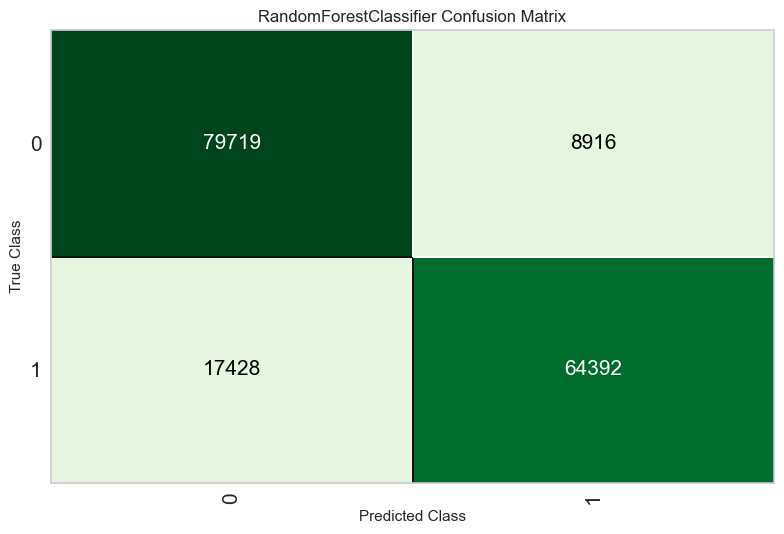

In [19]:
# functional API
plot_model(best[0], plot = 'confusion_matrix')

In [21]:
predictions = predict_model(best[0], data=data, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9536,0.9851,0.9361,0.9662,0.9509,0.9070,0.9074


,nit_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,pagos_tanque,promesas_cumplidas,rpc,marca_debito_mora,dias_mora_fin,cant_acuerdo,cant_gestiones,porc_pago_cuota,pago_mes,pago_cuota,saldo_capital,vlr_vencido,endeudamiento,var_rpta_alt,prediction_label,prediction_score_0,prediction_score_1
0,630611,863073,202308,Sin pago,0,1.0,NO,71,0.0,0,0.095438,0.0,100000.0,5808115.5,1000259.0,12134572.0,1,1,0.2900,0.7100
1,59412,290775,202312,Sin pago,0,1.0,NO,0,0.0,0,0.000000,0.0,0.0,9451816.0,443638.0,15479703.0,1,1,0.0635,0.9365
2,277595,34433,202312,Sin pago,0,0.0,NO,65,0.0,0,0.000000,0.0,0.0,75144224.0,7650063.0,95148048.0,1,1,0.0191,0.9809
3,26897,494556,202311,Con pago,0,1.0,NO,0,4.0,0,0.042117,4090.0,11241.0,3785620.0,266898.0,47499160.0,1,1,0.0000,1.0000
4,24588,18953,202311,Sin pago,0,1.0,NO,32,0.0,0,0.000000,0.0,0.0,787131.0,43471.0,241003248.0,1,1,0.2399,0.7601
